# 1. Import packages

In [2]:
import os
import pickle
import subprocess
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
# imputer for handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling  
import xgboost as xgb
from xgboost import plot_importance

%matplotlib inline 

In [2]:
# some settings for displaying Pandas results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# 2. Load data

In [3]:
data_train = "../home-credit-default-risk/application_train.csv"
data_test = "../home-credit-default-risk/application_test.csv"

In [4]:
df_train = pd.read_csv(data_train)
df_test = pd.read_csv(data_test)

In [5]:
df_train.shape

(307511, 122)

In [6]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.7296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### The training data has 122 clumns and one of this is TARGET 

In [7]:
df_test.shape

(48744, 121)

In [8]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.0188,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.7526,0.7897,0.1595,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.0358,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.5650,0.2917,0.4330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.0191,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.6998,0.6110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.0

### The testing data has 121 clumns and lacks a TARGET column

# 3. Train - Validation - Test (tvt) split

In [9]:
# get ids and target label
df_tvt = df_train[["SK_ID_CURR", "TARGET"]].copy()
df_tvt["tvt_code"] = "kaggle_test"

# target
y = df_tvt["TARGET"]

# index
X = df_tvt["SK_ID_CURR"]

# train, val, test set will be 70%, 15%, 15% of the dataset respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17, random_state=1)

# check validity
assert X.shape[0] == X_train.shape[0] + X_val.shape[0] + X_test.shape[0], "TVT split not correct"

# assign code
df_tvt.loc[X_train.index, "tvt_code"] = "train"
df_tvt.loc[X_val.index, "tvt_code"] = "val"
df_tvt.loc[X_test.index, "tvt_code"] = "test"

df_tvt.head()

,SK_ID_CURR,TARGET,tvt_code
0,100002,1,train
1,100003,0,train
2,100004,0,train
3,100006,0,train
4,100007,0,train


In [10]:
# extend for kaggle test
df_test_extend = df_test.copy()
df_test_extend["TARGET"] = -1
df_test_extend["tvt_code"] = "kaggle_test"

df_tvt_extend = pd.concat([df_tvt, df_test_extend[["SK_ID_CURR", "TARGET", "tvt_code"]]])
df_tvt_extend = df_tvt_extend.reset_index(drop=True)
df_tvt_extend.head()

,SK_ID_CURR,TARGET,tvt_code
0,100002,1,train
1,100003,0,train
2,100004,0,train
3,100006,0,train
4,100007,0,train


In [11]:
# check validity
assert df_tvt_extend.shape[0] == df_tvt_extend["SK_ID_CURR"].nunique(), "Extend TVT overlaped"

In [12]:
# check tvt percentage
df_tvt_check = df_tvt_extend["tvt_code"].value_counts().to_frame("cnt")
df_tvt_check["percentage"] = df_tvt_check["cnt"] * 100.0 / df_tvt.shape[0]
df_tvt_check

,cnt,percentage
train,216948,70.5497
kaggle_test,48744,15.8511
test,46127,15.0001
val,44436,14.4502


In [13]:
# Create folder
os.makedirs('../features', exist_ok=True)
# save tvt split
df_tvt_extend.to_pickle("../features/df_tvt_extend.pkl", compression="bz2")

# 4. Explore Data Analysis 

## 4.1. Check Overlap and Duplicate 

In [14]:
# check overlap
train_ids = df_train["SK_ID_CURR"]
test_ids = df_test["SK_ID_CURR"]
number_overlap = len(set(train_ids) & set(test_ids))
print("Number of overlap ids: {}".format(number_overlap))

Number of overlap ids: 0


In [15]:
# check duplicate
if len(train_ids.drop_duplicates()) == df_train.shape[0]:
    print("Train data no duplicate")
if len(test_ids.drop_duplicates()) == df_test.shape[0]:
    print("Test data no duplicate")


Train data no duplicate
Test data no duplicate


##  4.2. Distribution of the Target Column

In [16]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Text(0, 0.5, 'Frequency')

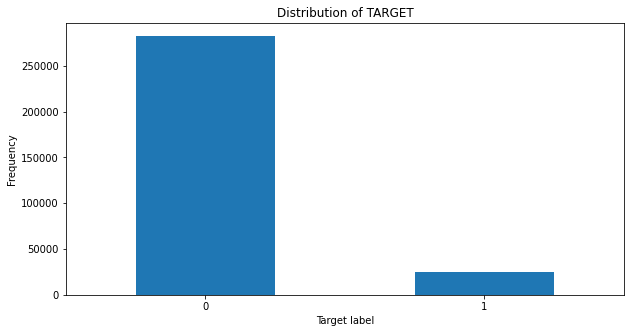

In [17]:
df_train['TARGET'].value_counts().plot.bar(title='Distribution of TARGET', rot=0, figsize=(10, 5))
plt.xlabel('Target label')
plt.ylabel('Frequency')

## 4.4. The influence of gender on the ability to pay late payments

In [ ]:
# Because the amount of XNA is very small, we will drop it
target_genders = df_train[df_train['CODE_GENDER'] != 'XNA'][['SK_ID_CURR', 'TARGET', 'CODE_GENDER']]

In [21]:
target_genders.head()

,SK_ID_CURR,TARGET,CODE_GENDER
0,100002,1,M
1,100003,0,F
2,100004,0,M
3,100006,0,F
4,100007,0,M


In [22]:
target_group = target_genders.groupby(['TARGET', 'CODE_GENDER']).count()['SK_ID_CURR']

In [23]:
target_group

TARGET  CODE_GENDER
0       F              188278
        M               94404
1       F               14170
        M               10655
Name: SK_ID_CURR, dtype: int64

Text(0, 0.5, 'Frequency')

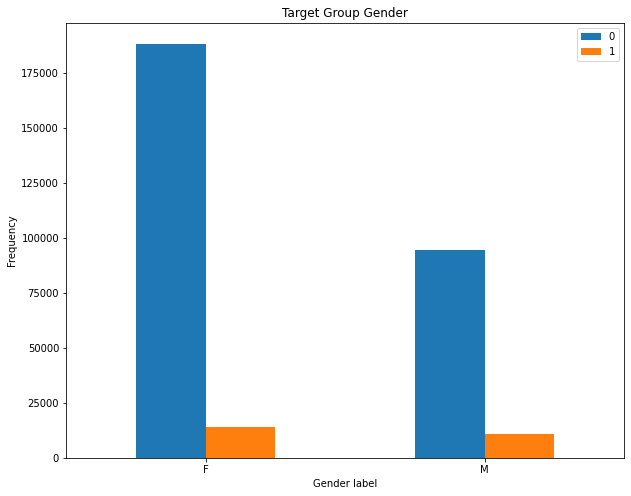

In [25]:
pd.DataFrame({'0': target_group[0].to_list(), '1': target_group[1].to_list()}, 
             index=genders).plot.bar(title='Target Group Gender', rot=0, figsize=(10, 8))
plt.xlabel('Gender label')
plt.ylabel('Frequency')

## 4.5. Check missing values

In [26]:
total_miss_values = df_train.isnull().sum().sort_values(ascending = False)

In [27]:
pct_miss_values = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)

In [28]:
miss_train = pd.concat([total_miss_values, pct_miss_values], axis=1, keys=['Total', 'Percent'])

In [29]:
miss_train.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.8723
COMMONAREA_AVG,214865,69.8723
COMMONAREA_MODE,214865,69.8723
NONLIVINGAPARTMENTS_MODE,213514,69.4330
NONLIVINGAPARTMENTS_AVG,213514,69.4330
NONLIVINGAPARTMENTS_MEDI,213514,69.4330
FONDKAPREMONT_MODE,210295,68.3862
LIVINGAPARTMENTS_MODE,210199,68.3550
LIVINGAPARTMENTS_AVG,210199,68.3550
LIVINGAPARTMENTS_MEDI,210199,68.3550


## 4.6. Processing 

#### 4.6.1. NAME_TYPE_SUITE - Who accompanied client when applying for the previous application

In [30]:
df_train['NAME_TYPE_SUITE'].isnull().sum()

1292

In [31]:
df_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### Unaccompanied is most common, so we'll replace null values with Unaccompanied

In [32]:
df_train['NAME_TYPE_SUITE'].fillna(value='Unaccompanied', inplace=True)
df_test['NAME_TYPE_SUITE'].fillna(value='Unaccompanied', inplace=True)

#### 4.6.2. OWN_CAR_AGE - Age of Client's Car

In [33]:
df_train['OWN_CAR_AGE'].isna().mean()

0.6599081008484249

#### 65% customers did't fill in OWN_CAR_AGE or they don't have a car. Replace null values with 0

In [34]:
df_train['OWN_CAR_AGE'].fillna(value=0, inplace=True)
df_test['OWN_CAR_AGE'].fillna(value=0, inplace=True)

### 4.6.3. Percent credit and income

In [35]:
# AMT_CREDIT: Credit amount of the loan
# AMT_INCOME_TOTAL: Income of the client
# AMT_ANNUITY: Loan annuity

df_train['CREDIT_INCOME_PERCENT'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_train['ANNUITY_INCOME_PERCENT'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
df_train['CREDIT_TERM'] = df_train['AMT_ANNUITY'] / df_train['AMT_CREDIT']

df_test['CREDIT_INCOME_PERCENT'] = df_test['AMT_CREDIT'] / df_test['AMT_INCOME_TOTAL']
df_test['ANNUITY_INCOME_PERCENT'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']
df_test['CREDIT_TERM'] = df_test['AMT_ANNUITY'] / df_test['AMT_CREDIT']

### 4.6.4. Check Column type

In [36]:
df_train.dtypes.value_counts()

float64    68
int64      41
object     16
dtype: int64

### 4.6.5. Check the number of unique classes in each object column


In [37]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 4.6.6. Label Encoding and One-Hot Encoding

For any categorical variable (dtype == object) with 2 unique categories, use label encoding, and for any categorical variable with more than 2 unique categories, use one-hot encoding.

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [38]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [39]:
# one-hot encoding of categorical variables
train_baseline = pd.get_dummies(df_train)
test_baseline = pd.get_dummies(df_test)

print('Training Features shape: ', train_baseline.shape)
print('Testing Features shape: ', test_baseline.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


#### Aligning Training and Testing Data

In [40]:
train_labels = train_baseline['TARGET']
# Align the training and testing data, keep only columns present in both dataframes
train_baseline, test_baseline = train_baseline.align(test_baseline, join = 'inner', axis = 1)

# Add the target back in
train_baseline['TARGET'] = train_labels


In [41]:
print('Training Features shape: ', train_baseline.shape)
print('Testing Features shape: ', test_baseline.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 242)


### 4.6.7. Find outlier for column"DAYS_BIRTH" and "DAYS_EMPLOYED"

In [42]:
(train_baseline['DAYS_BIRTH'] / -365).describe()

count    307511.0000
mean         43.9370
std          11.9561
min          20.5178
25%          34.0082
50%          43.1507
75%          53.9233
max          69.1205
Name: DAYS_BIRTH, dtype: float64

In [43]:
(test_baseline['DAYS_EMPLOYED'] / -365).describe()

count    48744.0000
mean      -184.8914
std        395.4754
min      -1000.6658
25%          0.8110
50%          3.5425
75%          7.9726
max         47.8438
Name: DAYS_EMPLOYED, dtype: float64

#### Check the anomalous clients to see they have higher or low rates of default than the rest of the clients

In [44]:
anom = train_baseline[train_baseline['DAYS_EMPLOYED'] == 365243]
non_anom = train_baseline[train_baseline['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


#### Fill in the anomalous values with not a number in training and test dataset, then create a new boolean column indicating whether or not the value was anomalous.

In [45]:
# Create an anomalous flag column
train_baseline['DAYS_EMPLOYED_ANOM'] = train_baseline["DAYS_EMPLOYED"] == 365243
test_baseline['DAYS_EMPLOYED_ANOM'] = test_baseline["DAYS_EMPLOYED"] == 365243
# Replace the anomalous values with nan
train_baseline['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
test_baseline["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [46]:
print('There are %d anomalies in the test data out of %d entries' % (test_baseline["DAYS_EMPLOYED_ANOM"].sum(), len(test_baseline)))

There are 9274 anomalies in the test data out of 48744 entries


Text(0.5, 0, 'Days Employment')

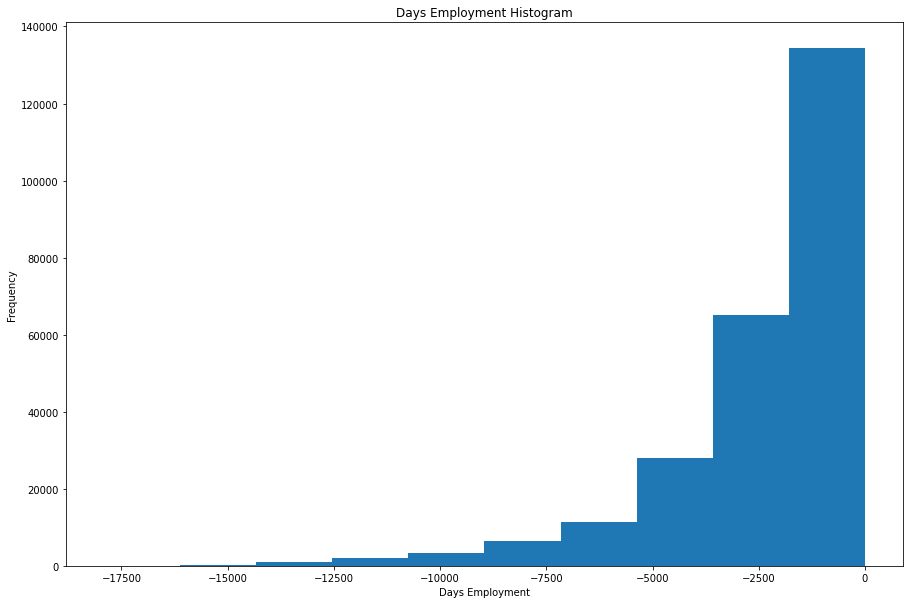

In [47]:
# Check values distribution after repalcementin in train dataset
plt.figure(figsize = (15, 10))
train_baseline['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

### 4.6.8. Find correlations

In [48]:
# Find correlations with the target and sort
correlations = train_baseline.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.0430
FLAG_DOCUMENT_3                                      0.0443
REG_CITY_NOT_LIVE_CITY                               0.0444
FLAG_EMP_PHONE                                       0.0460
NAME_EDUCATION_TYPE_Secondary / secondary special    0.0498
REG_CITY_NOT_WORK_CITY                               0.0510
DAYS_ID_PUBLISH                                      0.0515
CODE_GENDER_M                                        0.0547
DAYS_LAST_PHONE_CHANGE                               0.0552
NAME_INCOME_TYPE_Working                             0.0575
REGION_RATING_CLIENT                                 0.0589
REGION_RATING_CLIENT_W_CITY                          0.0609
DAYS_EMPLOYED                                        0.0750
DAYS_BIRTH                                           0.0782
TARGET                                               1.0000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3


##### DAYS_BIRTH (the age in days of the client at the time of the loan in negative days) is the most positive correlation, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0).

### 4.6.9. Process DAY columns

In [49]:
# The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. Make it is positive.
train_baseline["DAYS_BIRTH"] = abs(train_baseline["DAYS_BIRTH"])
test_baseline["DAYS_BIRTH"] = abs(test_baseline["DAYS_BIRTH"])


train_baseline["DAYS_REGISTRATION"] = abs(train_baseline["DAYS_REGISTRATION"])
test_baseline["DAYS_REGISTRATION"] = abs(test_baseline["DAYS_REGISTRATION"])


train_baseline["DAYS_ID_PUBLISH"] = abs(train_baseline["DAYS_ID_PUBLISH"])
test_baseline["DAYS_ID_PUBLISH"] = abs(test_baseline["DAYS_ID_PUBLISH"])

train_baseline["DAYS_LAST_PHONE_CHANGE"] = abs(train_baseline["DAYS_LAST_PHONE_CHANGE"])
test_baseline["DAYS_LAST_PHONE_CHANGE"] = abs(test_baseline["DAYS_LAST_PHONE_CHANGE"])

### 4.6.10. Polynomial Features

In [50]:
# Make a new dataframe for polynomial features
poly_features_train = train_baseline[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test_baseline[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features_train['TARGET']

poly_features_train = poly_features_train.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features_train = imputer.fit_transform(poly_features_train)
poly_features_test = imputer.transform(poly_features_test)

                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [51]:
# Train the polynomial features
poly_transformer.fit(poly_features_train)

# Transform the features
poly_features_train = poly_transformer.transform(poly_features_train)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features_train.shape)

Polynomial Features shape:  (307511, 35)


In [52]:
# Create a dataframe of the features 
poly_features_train = pd.DataFrame(poly_features_train, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features_train['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features_train.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.1939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.1896
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.1813
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.1764
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.1723
EXT_SOURCE_1 EXT_SOURCE_2                -0.1666
EXT_SOURCE_1 EXT_SOURCE_3                -0.1641
EXT_SOURCE_2                             -0.1603
EXT_SOURCE_2 DAYS_BIRTH                  -0.1569
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.1569
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.0782
DAYS_BIRTH^2   -0.0767
DAYS_BIRTH^3   -0.0743
TARGET          1.0000
1                  NaN
Name: TARGET, dtype: float64


In [53]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features_train['SK_ID_CURR'] = train_baseline['SK_ID_CURR']
train_baseline_extend = train_baseline.merge(poly_features_train, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test_baseline['SK_ID_CURR']
test_baseline_extend = test_baseline.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
train_baseline_extend, test_baseline_extend = train_baseline_extend.align(test_baseline_extend, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train_baseline_extend.shape)
print('Testing data with polynomial features shape:  ', test_baseline_extend.shape)

Training data with polynomial features shape:  (307511, 278)
Testing data with polynomial features shape:   (48744, 278)


## 5. Save fetures

### 5.1. Concat train_baseline and test_baseline

In [59]:
df_concated = pd.concat([train_baseline, test_baseline]).reset_index(drop=True)

### 5.2. Combine baseline and df_tvt_extend

In [60]:
df_features = df_tvt_extend.merge(df_concated, on="SK_ID_CURR", how="left")
print(df_features.shape)
df_features.head()

(356255, 246)


,SK_ID_CURR,TARGET_x,tvt_code,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity T

## 6. Modeling

In [61]:
meta_cols = ["SK_ID_CURR", "TARGET_x", "tvt_code", 'TARGET_y']
ls_features = [cname for cname in df_features.columns if cname not in meta_cols]
print("Number of features: {}".format(len(ls_features)))
print(df_features.shape)

Number of features: 242
(356255, 246)


In [62]:
version = 'v1.1'

In [65]:
def get_Xy_from_pdf(pdf_input, ls_features, tvt_code):
    
    pdf_data = pdf_input[pdf_input["tvt_code"] == tvt_code].copy()
    
    X = pdf_data[ls_features]
    y = pdf_data["TARGET_x"]
    
    return (X, y)

In [66]:
X_train, y_train = get_Xy_from_pdf(df_features, ls_features, "train")
X_val, y_val = get_Xy_from_pdf(df_features, ls_features, "val")
X_test, y_test = get_Xy_from_pdf(df_features, ls_features, "test")

In [68]:
%%time
param_init = {
    "objective": "binary:logistic", 
    "booster": "gbtree", 
    "max_depth": 4, # default: 3 only for depthwise
    "n_estimators": 1000, # default: 500  
    "learning_rate": 0.025, # default: 0.05 
    "subsample": 0.7, 
    "colsample_bytree": 0.6,  # default:  1.0
    "colsample_bylevel": 0.5, # default: 1.0
    "random_state": 0,
    
    #
    "silent": True, 
    "n_jobs": 16, 
    
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}

param_fit = {
    "eval_metric": "auc", 
    "early_stopping_rounds": 500, # default: 100
    "verbose": 200,
    "eval_set": [(X_train, y_train), (X_val, y_val), (X_test, y_test)]
}

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 12.2 µs


In [69]:
xgb_model = xgb.XGBClassifier(**param_init)
xgb_model.fit(X_train, y_train, **param_fit)
evals_result = xgb_model.evals_result()

[01:53:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.67883	validation_1-auc:0.66919	validation_2-auc:0.67591
[200]	validation_0-auc:0.75758	validation_1-auc:0.74409	validation_2-auc:0.75737
[400]	validation_0-auc:0.77274	validation_1-auc:0.75393	validation_2-auc:0.76634
[600]	validation_0-auc:0.78253	validation_1-auc:0.75794	validation_2-auc:0.77030
[800]	validation_0-auc:0.79080	validation_1-auc:0.76029	validation_2-auc:0.77254
[999]	validation_0-auc:0.79775	validation_1-auc:0.76119	validation_2-auc:0.77375


In [70]:
# Create folder
os.makedirs('../models', exist_ok=True)
# save model to file
res_model = {
    "xgb_model": xgb_model,
    "features": ls_features
}
pickle.dump(res_model, open("../models/xgb_model_baseline_{}.mod".format(version), "wb"))

# 7. Model evaluates

In [71]:
# read model
with open("../models/xgb_model_baseline_{}.mod".format(version), "rb") as input_file:
    res_model = pickle.load(input_file)
res_model.keys()

dict_keys(['xgb_model', 'features'])

In [82]:
def visualize_auc(pdf, tvt_code, res_model):
    # get Xy and predict
    X, y = get_Xy_from_pdf(pdf, res_model["features"], tvt_code)
    y_pred = res_model["xgb_model"].predict_proba(X)[:, 1]
    
    # get values
    auc_value = metrics.roc_auc_score(y, y_pred)
    res01 = metrics.roc_curve(y, y_pred)

    # plot
    figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    lw = 2
    ax1.plot(res01[0], res01[1], color="darkorange",lw=lw, label="ROC")
    ax1.plot([0, 1], [0, 1], color="navy", label="Random", lw=lw, linestyle="--")
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    ax1.set_title("AUC = %0.5f"%(auc_value))
    ax1.legend(loc="lower right")

    # prediction probability histogram
    ax2.set_title("{} set (size: {})".format(tvt_code, y.shape[0]))
    ax2.hist(y_pred, bins=200)
    plt.savefig('../images/{}.png'.format('training_result_xgboost'), dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
# Create folder
os.makedirs('../images', exist_ok=True)

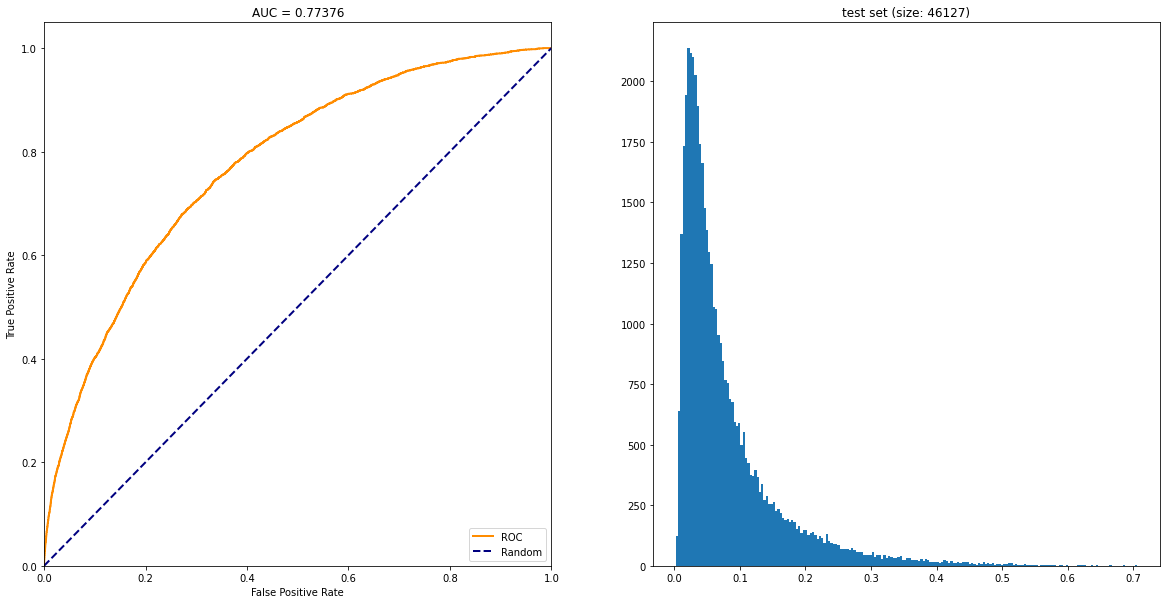

In [83]:
visualize_auc(df_features, "test", res_model)

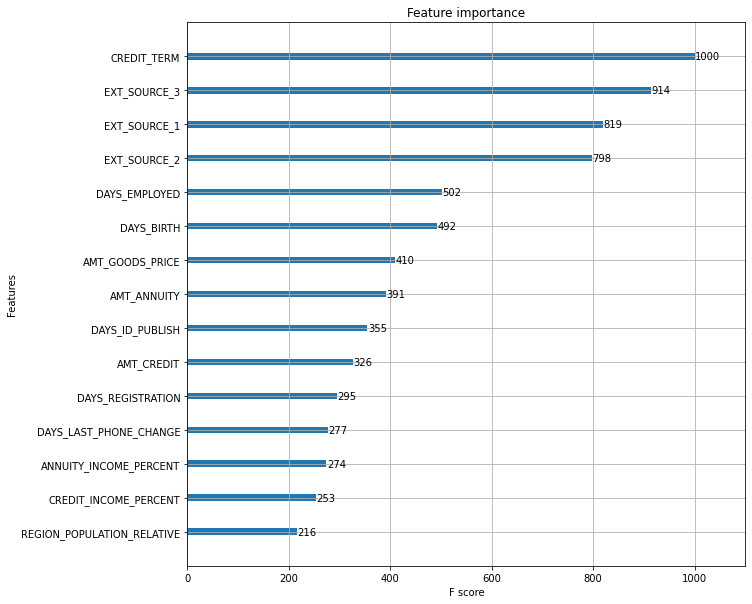

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(res_model["xgb_model"], ax=ax, max_num_features=15)
plt.savefig('../images/{}.png'.format('feature_importance'), dpi=300, bbox_inches='tight')
plt.show()

# 7. Save Submission

In [75]:
X_kaggle_test = df_features.query("tvt_code == 'kaggle_test'")[ls_features]
y_test_pred = xgb_model.predict_proba(X_kaggle_test)[:, 1]
y_test_pred.mean()

0.08047374

In [76]:
SK_IDs = df_features.query("tvt_code == 'kaggle_test'")["SK_ID_CURR"].tolist()
df_submiss = pd.DataFrame({"SK_ID_CURR": SK_IDs, "TARGET": y_test_pred})
df_submiss.to_csv("../project_3/submissions/submission_baseline_{}.csv".format(version), index=False)
df_submiss.head()

,SK_ID_CURR,TARGET
0,100001,0.0388
1,100005,0.1118
2,100013,0.0210
3,100028,0.0425
4,100038,0.1583
